date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


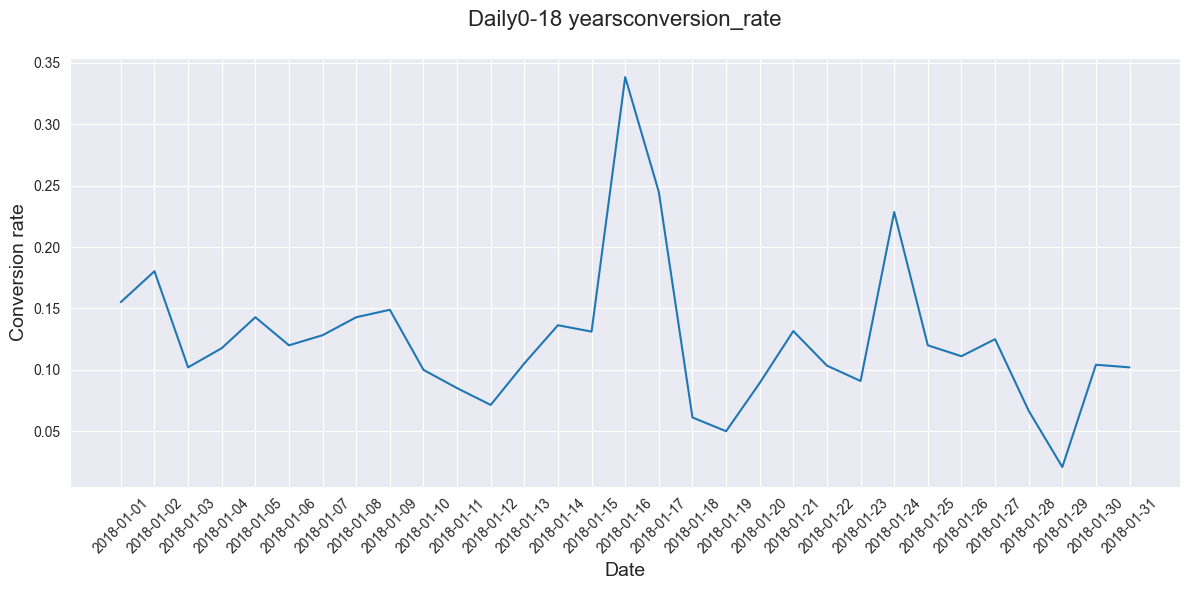

<Figure size 640x480 with 0 Axes>

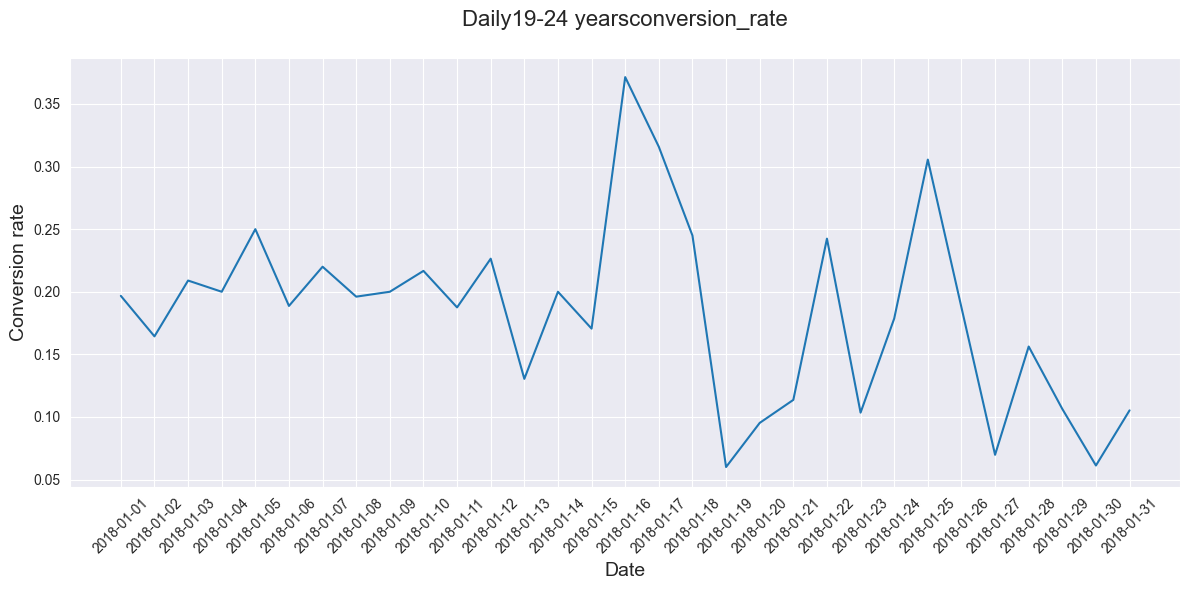

<Figure size 640x480 with 0 Axes>

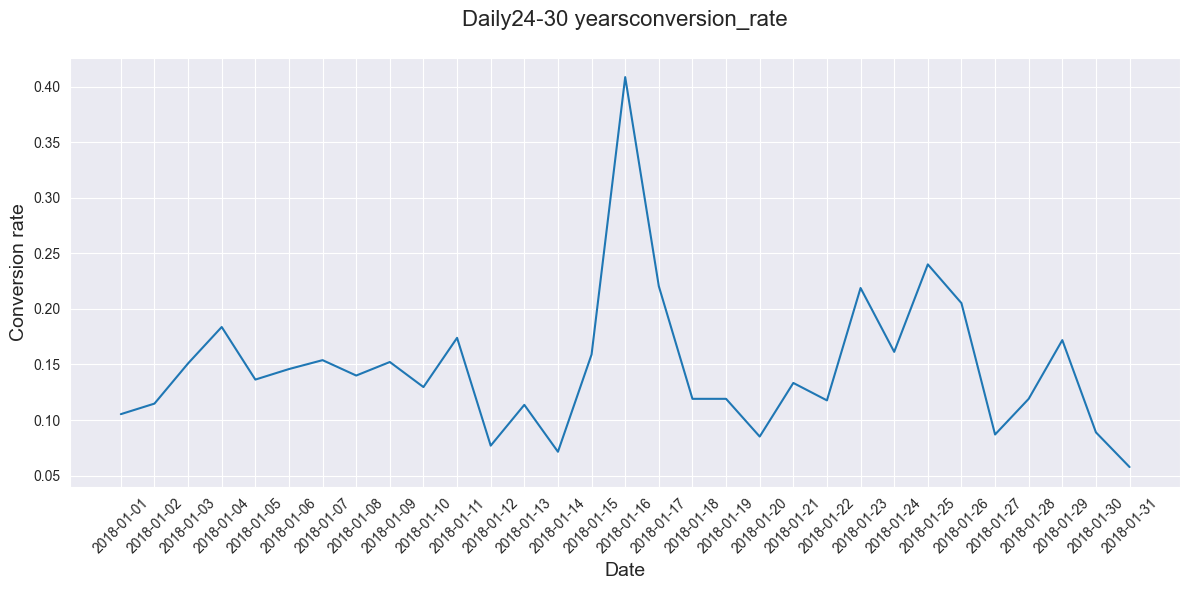

<Figure size 640x480 with 0 Axes>

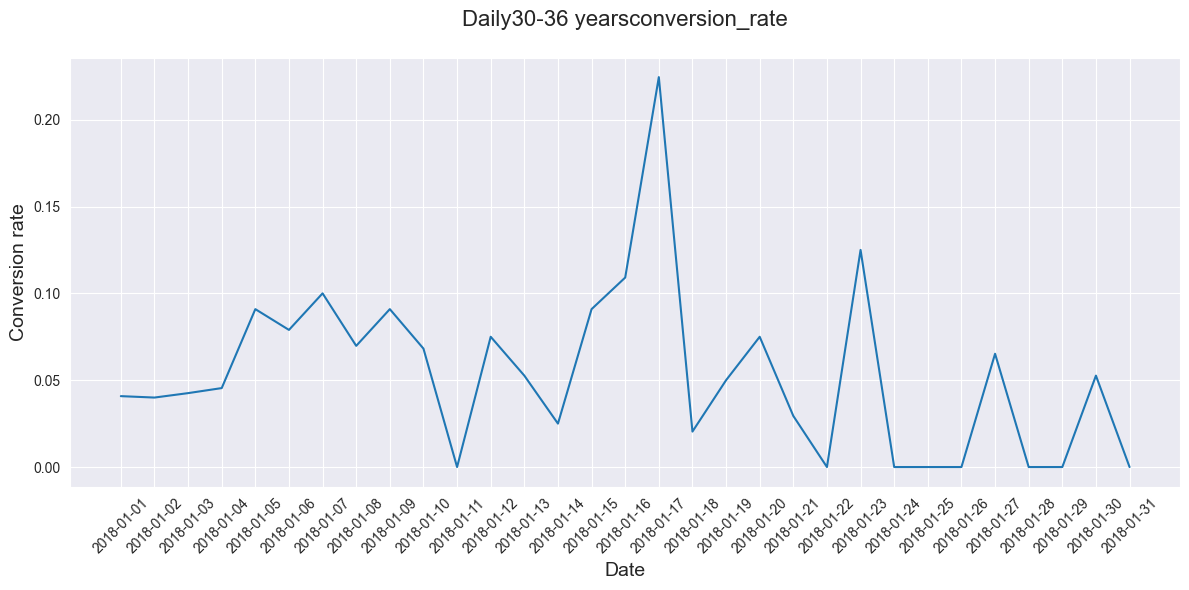

<Figure size 640x480 with 0 Axes>

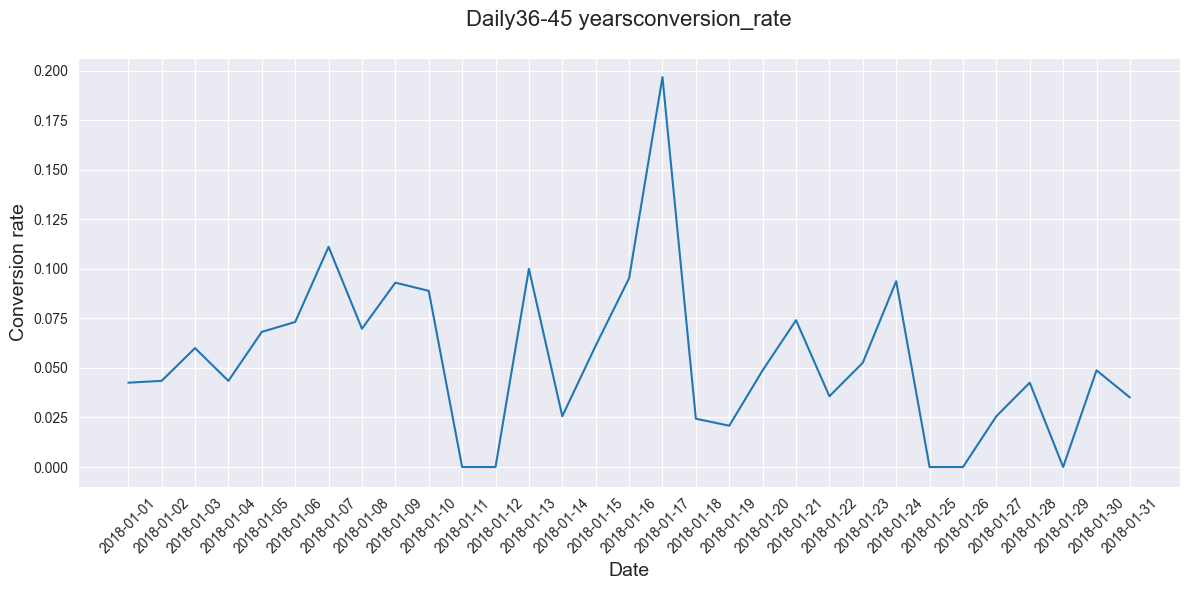

<Figure size 640x480 with 0 Axes>

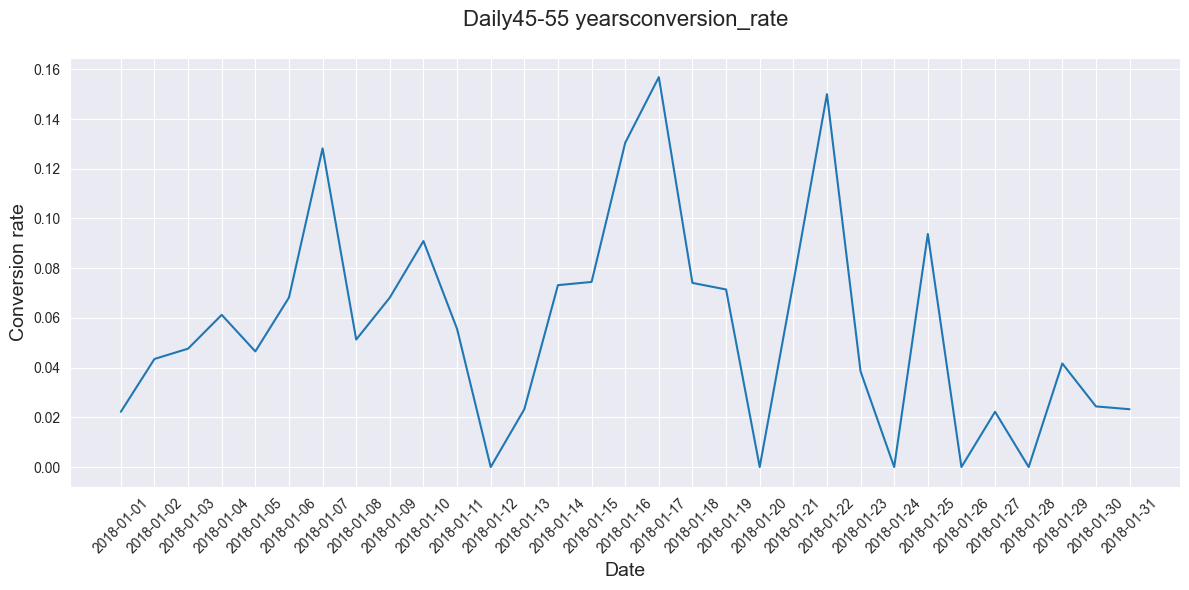

<Figure size 640x480 with 0 Axes>

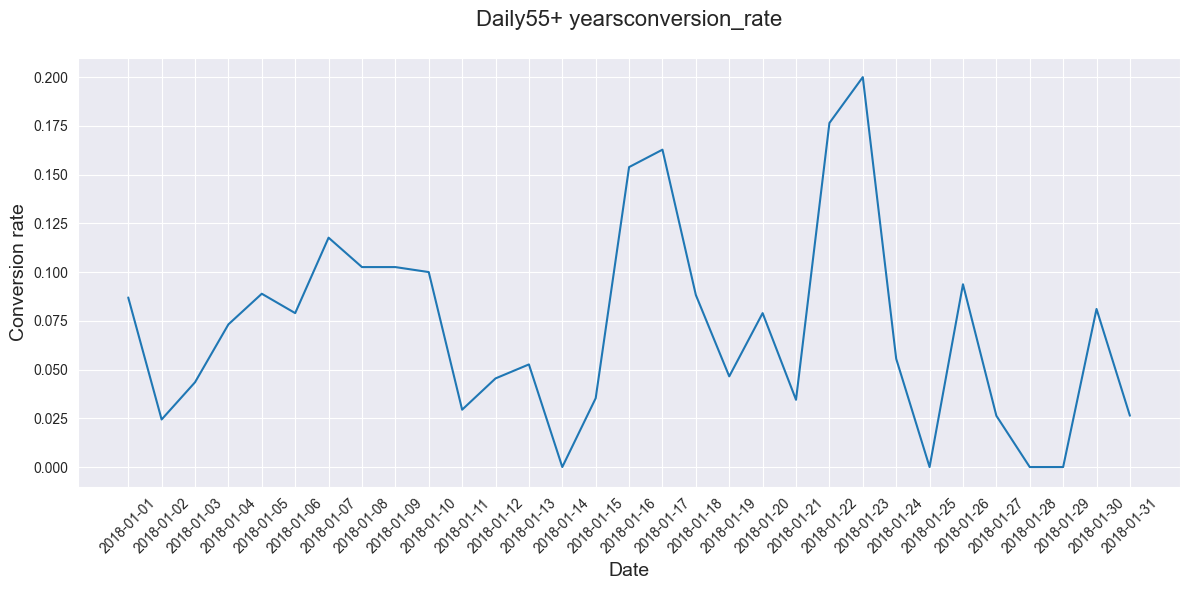

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("marketing_ok_date.csv", sep=",")

def conversion_rate(dataframe, columns_names):
    column_conv = dataframe[dataframe['converted'] == True].groupby(columns_names)['user_id'].nunique()
    column_total = dataframe.groupby(columns_names)["user_id"].nunique()

    conversion_rate = column_conv / column_total
    conversion_rate = conversion_rate.fillna(0)

    return conversion_rate

def plotting_conv(dataframe):
    for column in dataframe:
        plt.figure(figsize=(12, 6))
        plt.plot(dataframe.index, dataframe[column])

        plt.title("Daily" + str(column) + "conversion_rate\n", size = 16)
        plt.ylabel("Conversion rate", size=14)
        plt.xlabel("Date", size=14)
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()
        plt.clf()


if __name__ == '__main__':
    age_group_conv = conversion_rate(df, ['date_served', 'age_group'])
    print(age_group_conv)

    age_group_conv_df = pd.DataFrame(age_group_conv.unstack(level=1))
    plotting_conv(age_group_conv_df)